In [ ]:
! pip install deepface

In [ ]:
!pip install facenet-pytorch

In [ ]:
! pip install ultralytics

In [ ]:
!pip install mediapipe

**Commentaire:** dans cette partie on va installer les bibliiothèques, qu'on va les utiliser pour notre application.

In [ ]:
backends = [
  'opencv',
  'ssd',
  'mtcnn',
  'retinaface',
  'yolov8',
  'yunet',
  'fastmtcnn',
]

**Commentaire:** Ce code est une liste qui contient les models de préparation de donnée et la détection de visage dans une image.

In [ ]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepID",
  "ArcFace",
  "SFace",
]

**Commentaire :** Cette partie du code contient une liste de modèles entraînés pour la reconnaissance faciale. Nous allons utiliser l'un de ces modèles qui offre les meilleures performances. Ce modèle nous fournira en sortie un vecteur définissant les caractéristiques d'un visage. Nous comparons alors deux visages : un visage de référence avec un visage capturé par une caméra. La distance euclidienne entre les deux vecteurs nous permet de prédire avec précision si nous avons affaire à la même personne ou non. Donc avec cette méthode, nous réalisons la reconnaissance faciale d'une personne à partir d'une seule image de cette personne.

In [ ]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import time
from google.colab.patches import cv2_imshow

**Commentaire:**
Dans cette partie on a importé les bibliotheques de la reconnaissance faciale.

# **Etude des méthodes et modèles de detection et extraction des visages:**

In [ ]:
for i in range(len(backends)):
  print(backends[i])
  start_time = time.time()
  img = DeepFace.extract_faces("01.jpg", detector_backend=backends[i],enforce_detection = False)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")
  for j, face_data in enumerate(img):
    face_array = face_data['face']
    plt.subplot(1, len(img), j + 1)
    plt.imshow(face_array)
    plt.axis("off")
    plt.title(f"F{j+1}")
  plt.show()

opencv


ValueError: Confirm that 01.jpg exists

In [ ]:
for i in range(len(backends)):
  print(backends[i])
  start_time = time.time()
  img = DeepFace.extract_faces("02.jpg", detector_backend=backends[i],enforce_detection = False)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")
  for j, face_data in enumerate(img):
    face_array = face_data['face']
    plt.subplot(1, len(img), j + 1)
    plt.imshow(face_array)
    plt.axis("off")
    plt.title(f"F{j+1}")
  plt.show()

In [ ]:
for i in range(len(backends)):
  print(backends[i])
  start_time = time.time()
  img = DeepFace.extract_faces("03.jpg", detector_backend=backends[i],enforce_detection = False)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")
  for j, face_data in enumerate(img):
    face_array = face_data['face']
    plt.subplot(1, len(img), j + 1)
    plt.imshow(face_array)
    plt.axis("off")
    plt.title(f"F{j+1}")
  plt.show()

In [ ]:
for i in range(len(backends)):
  print(backends[i])
  start_time = time.time()
  img = DeepFace.extract_faces("04.jpg", detector_backend=backends[i],enforce_detection = False)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")
  for j, face_data in enumerate(img):
    face_array = face_data['face']
    plt.subplot(1, len(img), j + 1)
    plt.imshow(face_array)
    plt.axis("off")
    plt.title(f"F{j+1}")
  plt.show()

**Commentaire:**
Dans ce qui précède, on a testé differents modele d'extraction de visage et on peut bien voire que le modele 'unet' est le plus rapide en excution mais ça detecte pas tout les visage donc il a des performance un peu dégradé. On peut voir qu'on a des modele puissant en performance et qui detectent bien les visages mais sont pas rapide en excution. On peut déduire que le modele "fastmtcnn" est le plus puissant en temps d'excution et detection des visages dans une image. Donc par la suite on va prendre ce modele pour la realisation de notre application.

# **Etude des méthodes et modèles de reconnaissance faciale:**

# **Systeme avec une seul image de reference:**

In [ ]:
img1_path = "Reference.jpeg"
img2_path = "01.jpeg"

**Commentaire:**
Dans cette partie, j'ai défini des variables qui contiennent les chemins des deux photos dont nous voulons connaître les similarités.

In [ ]:
for i in range(len(models)):
  print(models[i])
  start_time = time.time()
  print(DeepFace.verify(img1_path,img2_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False))
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")

In [ ]:
img1_path = "Amine01.jpeg"
img2_path = "Amine02.jpeg"

In [ ]:
for i in range(len(models)):
  print(models[i])
  start_time = time.time()
  print(DeepFace.verify(img1_path,img2_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False))
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")

**Commentaire:**
Cette ligne de code teste la similarité entre deux photos en mesurant la distance entre les sorties du modèle entraîné. Si cette distance est inférieure à un certain seuil, cela indique que les deux photos représentent la même personne. Et on aura ***('verified': True,)***


**Commentaire:**
On peut remarquer que les modèles "VGG-Face", "ArcFace" et "SFace" sont les plus performants, tandis que les autres ont échoué pour deux photos de la même personne. On peut constater que le modèle "ArcFace" est le plus rapide en temps d'exécution, avec une différence de quelques secondes.

# **Systeme avec deux images de reference :**

In [ ]:
!unzip DATA.zip

**1er experience:**

In [ ]:
ref1_path = "/content/DATA/Brahim/Reference.jpeg"
ref2_path = "/content/DATA/Brahim/03.jpeg"
test_path = "/content/DATA/Brahim/02.jpeg"

In [ ]:
for i in range(len(models)):
  print(models[i])
  start_time = time.time()
  result1 = DeepFace.verify(ref1_path,test_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False)
  result2 = DeepFace.verify(ref2_path,test_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False)
  la_moyenne =  (result1["distance"]+result2["distance"])/2.0
  if (la_moyenne<result1['threshold']):
    print("True")
  else:
    print("False")
  print("distance minimale:",la_moyenne)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")

**2eme experience**

In [ ]:
ref1_path = "/content/DATA/Rimy/Reference.jpeg"
ref2_path = "/content/DATA/Rimy/02.jpeg"
test_path = "/content/DATA/Brahim/03.jpeg"

In [ ]:
for i in range(len(models)):
  print(models[i])
  start_time = time.time()
  result1 = DeepFace.verify(ref1_path,test_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False)
  result2 = DeepFace.verify(ref2_path,test_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False)
  la_moyenne =  (result1["distance"]+result2["distance"])/2.0
  if (la_moyenne<result1['threshold']):
    print("True")
  else:
    print("False")
  print("distance minimale:",la_moyenne)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")

**3eme experience:**

In [ ]:
ref1_path = "/content/DATA/Amine/01.jpeg"
ref2_path = "/content/DATA/Amine/06.jpeg"
test_path = "/content/DATA/Amine/07.jpeg"

In [ ]:
for i in range(len(models)):
  print(models[i])
  start_time = time.time()
  result1 = DeepFace.verify(ref1_path,test_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False)
  result2 = DeepFace.verify(ref2_path,test_path, model_name = models[i], detector_backend = backends[6] ,enforce_detection = False)
  la_moyenne =  (result1["distance"]+result2["distance"])/2.0
  if (la_moyenne<result1['threshold']):
    print("True")
  else:
    print("False")
  print("distance minimale:",la_moyenne)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")

# **Teste de systeme sur des images de mes camarades:**

In [ ]:
!unzip ClasseData.zip

Archive:  ClasseData.zip
replace 01.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 02.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 03.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 03.jpeg                 
  inflating: 04.jpeg                 


In [ ]:
inputimage = "01.jpeg"

opencv
Temps de detection 2.500791072845459 seconds


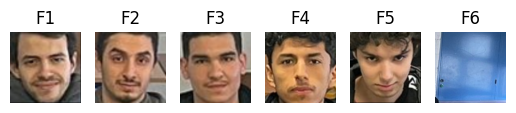

ssd
Temps de detection 0.16002750396728516 seconds


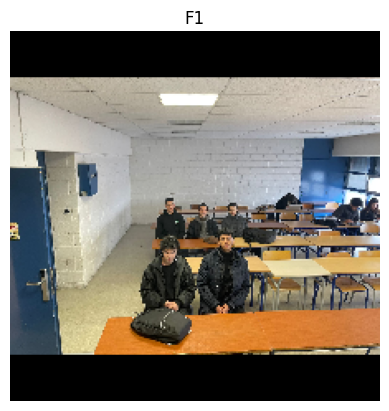

mtcnn
2/2 [==============================] - 0s 31ms/step
Temps de detection 3.4782347679138184 seconds


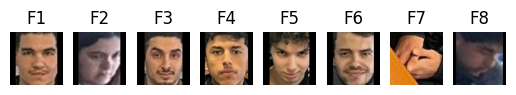

retinaface
Temps de detection 7.014271259307861 seconds


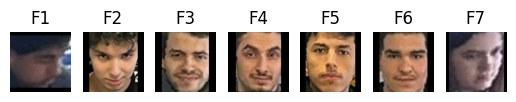

yolov8
Temps de detection 0.6452970504760742 seconds


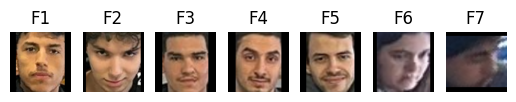

yunet
Temps de detection 0.1281263828277588 seconds


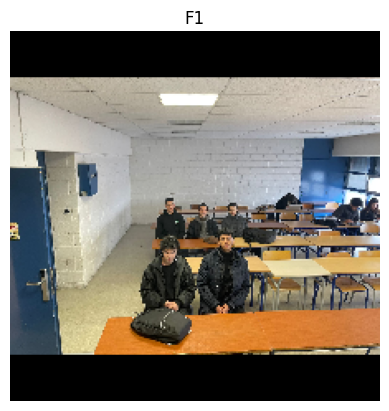

fastmtcnn
Temps de detection 1.739701509475708 seconds


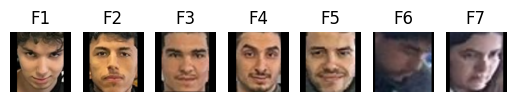

In [ ]:
for i in range(len(backends)):
  print(backends[i])
  start_time = time.time()
  img = DeepFace.extract_faces(inputimage, detector_backend=backends[i],enforce_detection = False)
  end_time = time.time()
  execution_time = end_time - start_time
  print("Temps de detection", execution_time, "seconds")
  for j, face_data in enumerate(img):
    face_array = face_data['face']
    plt.subplot(1, len(img), j + 1)
    plt.imshow(face_array)
    plt.axis("off")
    plt.title(f"F{j+1}")
  plt.show()

In [ ]:
len(img)

7

In [ ]:
Dict1 = {1:"DATA/Amine/06.jpeg", 2:"DATA/Anes/3.jpeg", 3:"DATA/Arselane/06.jpeg", 4:"DATA/Brahim/Reference.jpeg", 5:"DATA/Iheb/08.jpg", 6:"DATA/Rimy/Reference.jpeg"}
Dict2 = {1:"DATA/Amine/02.jpeg", 2:"DATA/Anes/2.jpeg", 3:"DATA/Arselane/02.jpeg", 4:"DATA/Brahim/02.jpeg", 5:"DATA/Iheb/02.jpeg", 6:"DATA/Rimy/02.jpeg"}
Dict = {1:"Amine", 2:"Anes", 3:"Arselan", 4:"Brahim", 5:"Iheb", 6:"Rimy"}
print("Facenet")
ListDePresence = []
ListeDeDistance = []
Repitition = []
ii = 0
start_time = time.time()
for j, face_data in enumerate(img):
    face_array = face_data['face']
    for i in range (6):
      result = DeepFace.verify(Dict1[i+1],face_array, model_name = "VGG-Face", detector_backend = backends[6] ,enforce_detection = False)
      if result["verified"] == True:
         ii = ii+1
         if ii < 2:
          ListDePresence.append(Dict[i+1])
          ListeDeDistance.append(result["distance"])
         if ii == 2:
          ListDePresence.pop(-1)
          ListDePresence.append("Inconnu")
          ListeDeDistance.pop(-1)
          ListeDeDistance.append("Inconnu")
    ii = 0

end_time = time.time()
execution_time = end_time - start_time
print("Temps de detection", execution_time, "seconds")
print(ListDePresence)
print(ListeDeDistance)
print(ii)

Facenet
Temps de detection 145.40120458602905 seconds
['Anes', 'Amine', 'Iheb', 'Brahim', 'Rimy', 'Inconnu']
[0.5522951073199798, 0.4124687366576113, 0.5544858084905906, 0.3572192136223531, 0.5824855254726656, 'Inconnu']
0


In [ ]:
range(len(Dict))

range(0, 6)

In [ ]:
for i in range(len(Dict)):
    if Dict[i+1] in ListDePresence:
      print(Dict[i+1] , " ---------------> present")
    else :
      print(Dict[i+1] , " ---------------> absent")

Amine  ---------------> present
Anes  ---------------> present
Arselan  ---------------> absent
Brahim  ---------------> present
Iheb  ---------------> present
Rimy  ---------------> present


In [ ]:
ListDePresenceDict = {1:"DATA/Amine/01.jpg", 2:"DATA/Anes/01.jpg", 3:"DATA/Arselan/01.jpg", 4:"DATA/Brahim/01.jpg", 5:"DATA/Iheb/01.jpg", 6:"DATA/Rimy/01.jpg"}

In [ ]:
Dict[6]

'DATA/Rimy/01.jpg'

In [ ]:
Dict1[i+1]

'DATA/Amine/01.jpg'

In [ ]:
result1 = DeepFace.verify("DATA/Amine/01.jpeg",test_path, model_name = "Facenet", detector_backend = backends[6] ,enforce_detection = False)

In [ ]:
# Définir votre liste
ma_liste = [1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 5, 1, 1, 6, 1, 1, 1]

# Initialiser une liste pour stocker les positions de début et de fin des séquences
positions = []

# Rechercher les séquences
i = 0
while i < len(ma_liste):
    if ma_liste[i] == 1:
        debut_sequence = i
        j = i + 1
        while j < len(ma_liste) and ma_liste[j] == ma_liste[j-1] + 1:
            j += 1
        if j - i > 1:
            fin_sequence = j - 1
            positions.append((debut_sequence, fin_sequence))
        i = j
    else:
        i += 1

# Afficher les positions des débuts et fins des séquences
print("Positions de début et fin des séquences de valeurs commençant par 1 :", positions)


Positions de début et fin des séquences de valeurs commençant par 1 : [(2, 4)]
